## Latihan Studi Kasus Clustering

Halo! Selamat telah menyelesaikan materi clustering hingga tuntas. Jangan lupa untuk memberi apresiasi pada diri sendiri karena sudah mempelajari banyak hal baru. Namun, tentu saja rasanya kurang sempurna jika kita hanya berfokus pada teori saja, bukan? Sekarang, saatnya kita mempraktikkan cara membangun model clustering menggunakan data sekunder.

Tanpa menunggu lama, mari kita bahas setiap stepnya, check it out!

## Import library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

## Data Loading


In [7]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dari hasil output df.info(), kita dapat melihat bahwa dataset ini terdiri atas 200 baris dan 5 kolom. Berikut adalah detail dari setiap kolom.

1. CustomerID: Ini berisi ID unik untuk setiap pelanggan, bertipe data int64.
2. Gender: Ini menunjukkan jenis kelamin pelanggan, bertipe data object (kategori).
3. Age: Ini menampilkan usia pelanggan dalam tahun, bertipe data int64.
4. Annual Income (k$): Ini berisi pendapatan tahunan pelanggan dalam ribuan dolar, bertipe data int64.
Spending Score (1-100): Ini menunjukkan skor pengeluaran pelanggan, mulai dari 1 hingga 100, bertipe data int64.

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Berdasarkan hasil statistik deskriptif yang ditampilkan oleh df.describe(), kita dapat melihat beberapa informasi penting mengenai kolom-kolom numerik dalam dataset.

1. CustomerID

    Ini terdiri dari 200 data unik dengan nilai rata-rata 100.5.

    ID pelanggan bervariasi dari 1 hingga 200.

2. Age (Usia)

    Usia pelanggan berkisar antara 18 hingga 70 tahun dengan rata-rata 38.85 tahun.

    Sebagian besar pelanggan berada pada rentang usia 28.75 hingga 49 tahun (kuartil ke-1 hingga ke-3).

3. Annual Income (k$) (Pendapatan Tahunan)

    Pendapatan tahunan pelanggan bervariasi antara 15 hingga 137 ribu dolar dengan rata-rata 60.56 ribu dolar.

    Sebagian besar pelanggan memiliki pendapatan tahunan antara 41.5 hingga 78 ribu dolar.

4. Spending Score (1–100) (Skor Pengeluaran)

    Skor pengeluaran pelanggan bervariasi dari 1 hingga 99 dengan rata-rata skor pengeluaran sebesar 50.2.

    Sebagian besar pelanggan memiliki skor pengeluaran antara 34.75 hingga 73.

Statistik ini memberikan gambaran awal tentang distribusi dan variasi data pada dataset, yang sangat penting untuk analisis lebih lanjut, terutama dalam mengidentifikasi cluster pelanggan berdasarkan karakteristik, seperti usia, pendapatan, serta perilaku belanja.

## Exploratory Data Analysis

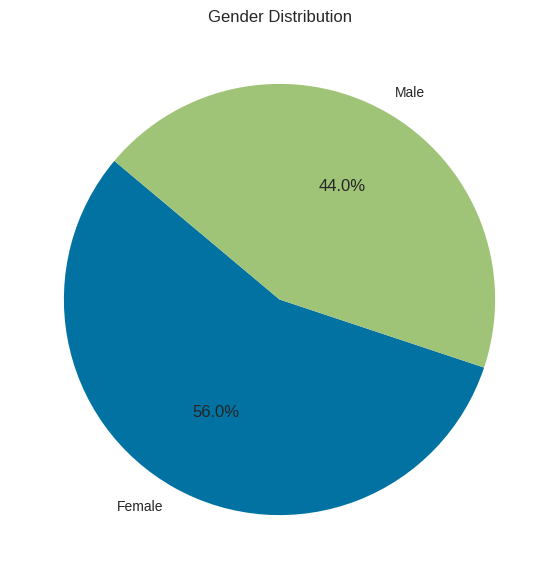

In [13]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.show()


## data binning

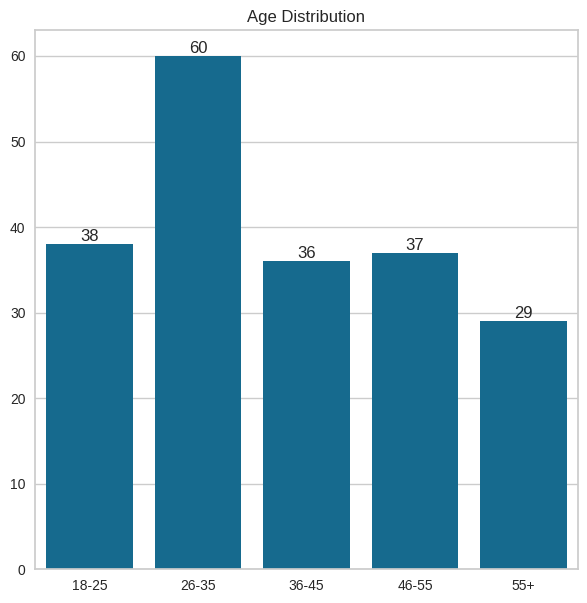

In [14]:
age18_25 = df[(df['Age'] >= 18) & (df['Age'] <= 25)]
age26_35 = df[(df['Age'] >= 26) & (df['Age'] <= 35)]
age36_45 = df[(df['Age'] >= 36) & (df['Age'] <= 45)]
age46_55 = df[(df['Age'] >= 46) & (df['Age'] <= 55)]
age55above = df[df['Age'] > 55]

# menyususn data untuk plotting
x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age18_25), len(age26_35), len(age36_45), len(age46_55), len(age55above)]

plt.figure(figsize=(7, 7))
sns.barplot(x=x, y=y)
plt.title("Age Distribution")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Berikut adalah visualisasi distribusi usia pelanggan berdasarkan kategori yang telah ditentukan.

1. 18–25 tahun: ada 38 pelanggan dalam rentang usia ini.
2. 26–35 tahun: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 60.
3. 36–45 tahun: ada 36 pelanggan dalam rentang usia ini.
4. 46–55 tahun: ada 37 pelanggan yang termasuk dalam kategori ini.
5. 55 tahun ke atas: rentang usia ini memiliki 29 pelanggan.

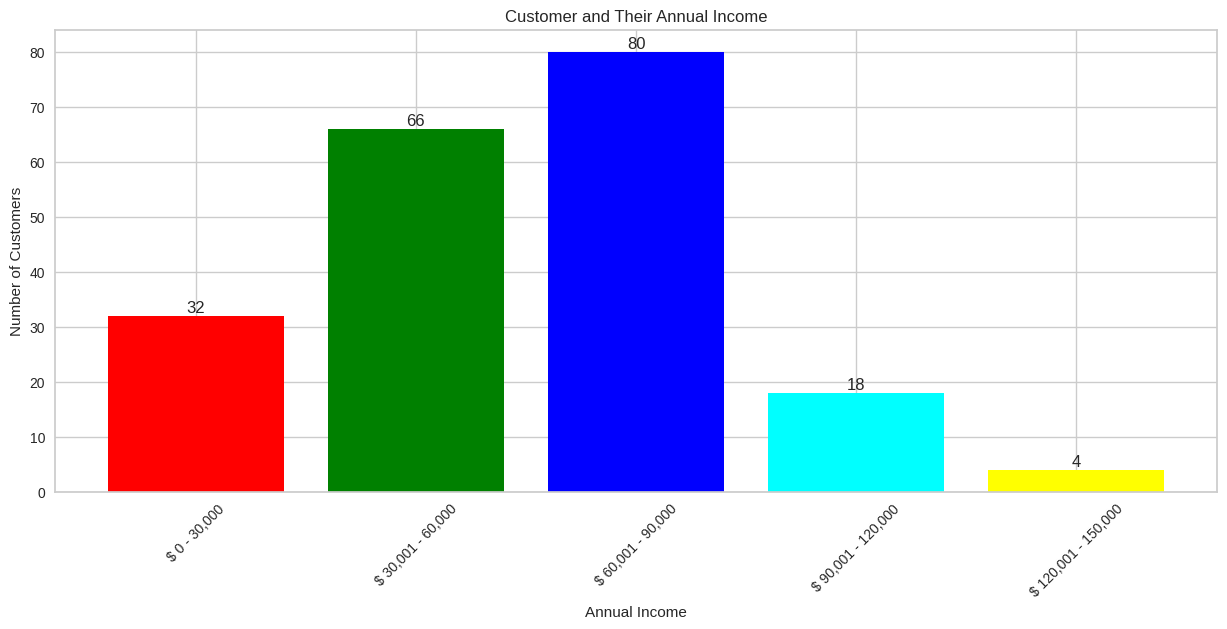

In [15]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
 
# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

Hasil visualisasi menunjukkan distribusi pendapatan tahunan pelanggan sebagai berikut.

1. $0–30,000: ada 32 pelanggan dalam rentang pendapatan ini.
2. $30,001–60,000: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 66.
3. $60,001–90,000: ada 80 pelanggan dalam rentang pendapatan ini dan menjadikannya kategori dengan jumlah pelanggan terbesar.
4. $90,001–120,000: rentang ini memiliki 18 pelanggan.
5. $120,001–150,000: kategori ini mencakup 4 pelanggan yang merupakan jumlah paling sedikit di antara semua kategori.

In [16]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values
 
# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [20]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Elbow Method

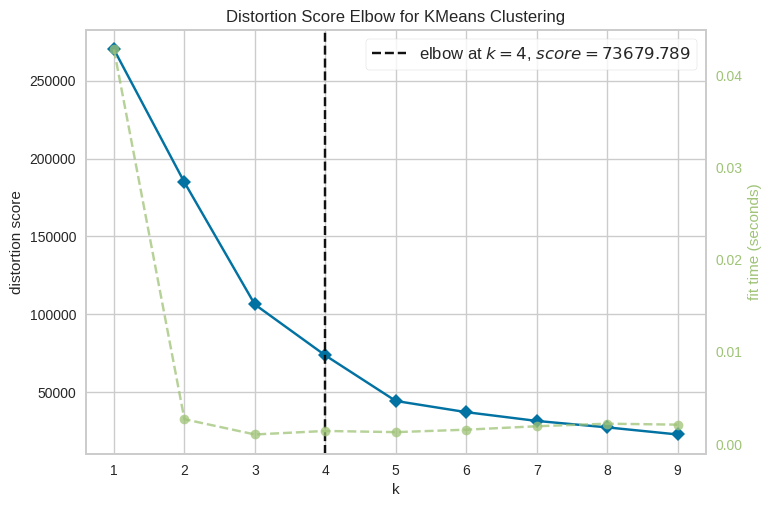

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [18]:
from sklearn.cluster import KMeans
 
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 4
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Annual Income
        mean_spending = cluster_data[:, 1].mean()  # Rata-rata Spending Score
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score (1-100): 56.48

Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13

Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score (1-100): 18.63

Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


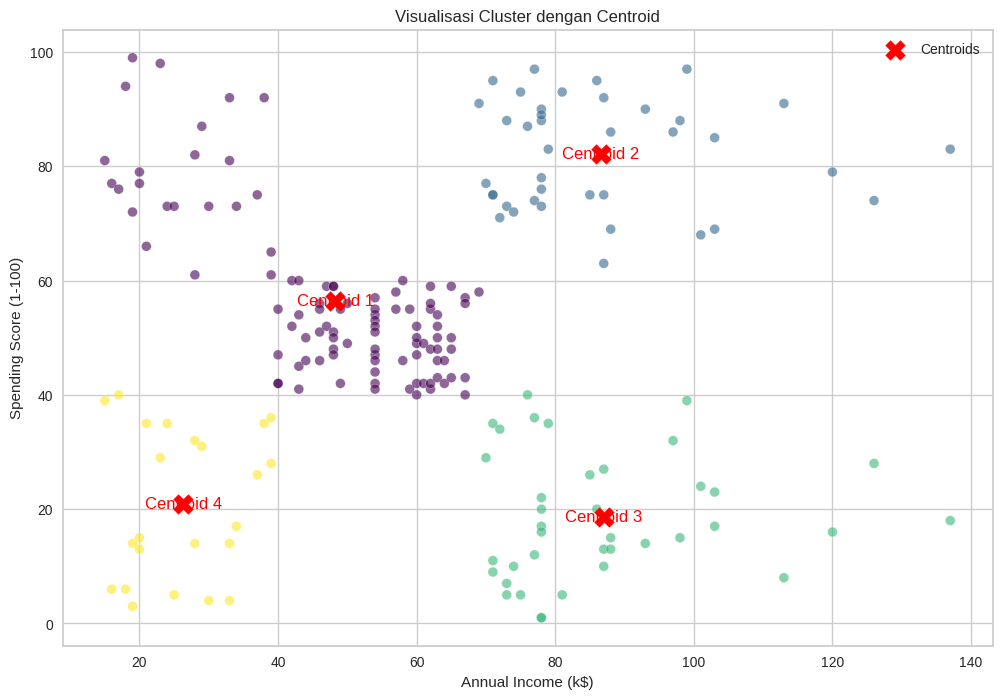

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [19]:
import matplotlib.pyplot as plt
 
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

Nilai centroid untuk setiap cluster sebagai berikut.

1. Centroid 1: pendapatan tahunan $48,260 serta skor belanja 56.48 menunjukkan pelanggan dengan pendapatan menengah dan belanja tinggi.
2. Centroid 2: pendapatan tahunan $86,540 serta skor belanja 82.13 menggambarkan pelanggan dengan pendapatan tinggi dan belanja intensif.
3. Centroid 3: pendapatan tahunan $87,000 serta skor belanja 18.63 menunjukkan pelanggan berpendapatan tinggi dan berbelanja sedikit.
4. Centroid 4: pendapatan tahunan $26,300 serta skor belanja 20.91 menunjukkan pelanggan dengan pendapatan dan belanja rendah.